In [ ]:
# number wrangling and data manipulation libraries
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning stuff (from easy to hard to interpret)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Metrics
from sklearn.metrics import classification_report, f1_score

# Preprocessing data
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 10)
pd.set_option("display.width", 1000)

In [ ]:
train_df = pd.read_csv("/content/drive/My Drive/ML/anforcom-final/train.csv")
test_df = pd.read_csv("/content/drive/My Drive/ML/anforcom-final/test.csv")
train_df

,id,phase,E-1,E-2,E-3,E-4,E-5,E-6,E-7,E-8,E-9,E-10,E-11,E-12,E-13,E-14,E-15,E-16,E-17,E-18,E-19,E-20,N-1,N-2,N-3,N-4,N-5,N-6,N-7,N-8,N-9,N-10,N-11,N-12,N-13,N-14,N-15,N-16,N-17,N-18,N-19,N-20,Z-1,Z-2,Z-3,Z-4,Z-5,Z-6,Z-7,Z-8,Z-9,Z-10,Z-11,Z-12,Z-13,Z-14,Z-15,Z-16,Z-17,Z-18,Z-19,Z-20,station,network
0,0,After Coda End,-40.060604,-260.707855,-2295.125732,-5077.934570,-6510.237793,-6507.307617,-6570.841309,-6639.744141,-6261.190918,-6191.536133,-6654.037109,-6459.147461,-4981.258789,-2970.630371,-549.699280,2704.145020,6348.871582,9580.367188,12435.742188,15163.663086,-5029.131836,-3787.323486,-1635.329712,2119.058350,6346.200684,9686.339844,11325.583008,11425.974609,10775.902344,10454.758789,10739.314453,10572.301758,9869.688477,9041.439453,7668.810059,5612.470703,3371.662354,1608.576782,-360.011902,-3231.628174,5428.997070,5594.584961,5736.034180,5441.422363,4161.860840,2014.200806,-608.578369,-2897.142822,-4219.393066,-4560.934082,-3962.783203,-2778.037842,-1636.636719,-481.137634,1250.591431,3423.129150,5408.335938,7083.473633,8639.500977,9888.334961,AOS,HT
1,1,After Coda End,-918.338989,-130.808212,-180.710327,-888.181763,-1270.482300,-1396.425903,-1328.800293,-1324.853394,-767.368103,564.345520,1180.163574,753.454956,-66.695610,-186.117279,310.698151,149.028900,30.619583,-185.249878,-462.578949,-73.493912,121.435196,-420.684601,-872.537048,-411.875458,-98.969269,305.729065,710.859497,1048.096313,1092.880371,330.013733,-144.233261,151.354126,1026.113770,1022.830200,108.532822,-141.509796,-60.169361,125.643799,5.504951,-344.741943,551.514954,814.050903,563.573914,299.703949,426.441467,464.495026,564.468201,211.075760,-742.190125,-1384.307617,-1262.869873,-794.917053,-606.994751,-341.463318,-216.040726,-132.499832,415.490448,750.097290,1068.296143,1360.592407,AOS,HT
2,2,S Wave,-19588.193359,-22775.435547,-14151.219727,-1106.306152,479.042145,8777.960938,27075.169922,24998.861328,-10157.221680,-42252.722656,-35833.734375,-8086.671875,2321.678711,-2553.412598,10277.180664,20692.191406,10998.099609,12476.018555,5748.741211,-7762.224609,-579.663513,-2761.152344,13688.013672,18213.367188,6268.839355,-13130.177734,-21194.490234,-22808.720703,-23715.708984,-15917.620117,-4393.823242,2756.402100,4904.950684,10903.893555,12745.006836,9031.471680,784.893127,-6691.601562,13687.459961,25569.240234,-4754.217285,-8068.525879,8111.342773,11481.857422,-12863.106445,-16096.814453,1140.030518,-1423.268311,-1245.661133,-474.940369,-602.357178,4773.454102,-6982.862305,-3364.717285,6015.947266,-10893.664062,-9635.690430,2515.936035,5403.634766,7697.293945,AC04,C1
3,3,Before P Arrival,71.364502,102.589439,140.858856,113.558861,72.772079,97.952866,132.099426,98.619576,75.076256,113.515007,140.526672,104.749893,87.441772,129.433685,134.542160,87.710861,76.909691,120.458710,125.518356,78.630280,-22.788469,-48.895435,-57.547829,-36.369774,-19.488638,-37.226971,-62.867161,-40.164726,-22.915100,-46.132118,-70.481361,-48.264305,-27.420830,-56.792816,-69.408607,-48.857933,-37.507820,-54.304897,-67.792526,-52.029034,-3.463021,-1.822688,3.506620,-0.910780,-12.688329,-15.054028,-13.036360,-19.335442,-24.467985,-23.818768,-22.992235,-30.511858,-33.640625,-28.372875,-31.518494,-40.343090,-43.658840,-37.447033,-41.053375,-54.754852,AOS,HT
4,4,After Coda End,11264.663086,16095.182617,16701.796875,15911.804688,13841.098633,11352.826172,9862.090820,9329.799805,10806.981445,11259.171875,9220.610352,7769.091309,7591.452637,11385.524414,20639.587891,33869.828125,51515.800781,69987.531250,87211.031250,101281.171875,133662.140625,141119.640625,144682.687500,142988.156250,132571.703125,114612.882812,94713.351562,74392.734375,57477.265625,42549.406250,25922.167969,6222.486816,-19100.253906,-47352.328125,-77821.062500,-110994.937500,-143378.359375,-174085.453125,-200801.484375,-221643.625000,-135307.453125,-119189.375000,-99691.773438,-77655.507812,-51961.750000,-23687.691406,2842.893799,25750.675781,43643.867188,59577.410156,77964.796875,99328.453125,122089.867188,141905.1

In [ ]:
print("station", train_df["station"].unique())
print("network", train_df["network"].unique())
print("phase", train_df["phase"].unique())


station ['AOS' 'AC04' 'AMT']
network ['HT' 'C1' 'HP']
phase ['After Coda End' 'S Wave' 'Before P Arrival' 'S Arrival' 'P Wave'
 'Coda End' 'P Arrival']


In [ ]:
print("station", test_df["station"].unique())
print("network", test_df["network"].unique())

station ['AMT' 'AC04' 'AOS']
network ['HP' 'C1' 'HT']


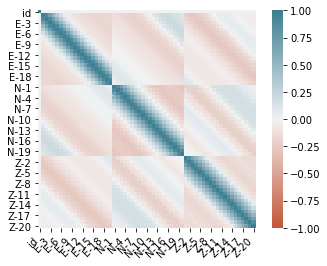

In [ ]:
corr = train_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
train_df.describe()

,id,E-1,E-2,E-3,E-4,E-5,E-6,E-7,E-8,E-9,E-10,E-11,E-12,E-13,E-14,E-15,E-16,E-17,E-18,E-19,E-20,N-1,N-2,N-3,N-4,N-5,N-6,N-7,N-8,N-9,N-10,N-11,N-12,N-13,N-14,N-15,N-16,N-17,N-18,N-19,N-20,Z-1,Z-2,Z-3,Z-4,Z-5,Z-6,Z-7,Z-8,Z-9,Z-10,Z-11,Z-12,Z-13,Z-14,Z-15,Z-16,Z-17,Z-18,Z-19,Z-20
count,35886.000000,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04
mean,17942.500000,-4.415238e+00,-4.257516e+00,-4.854258e+00,-5.821791e+00,-6.156094e+00,-5.510437e+00,-4.453830e+00,-3.531146e+00,-2.765893e+00,-2.215939e+00,-2.056998e+00,-2.144641e+00,-2.273797e+00,-2.299652e+00,-2.062756e+00,-1.779705e+00,-1.737291e+00,-1.990606e+00,-2.538190e+00,-3.202443e+00,2.901513e+00,3.307677e+00,3.261521e+00,3.122596e+00,3.232564e+00,3.325686e+00,2.973007e+00,2.450664e+00,2.137637e+00,2.151062e+00,2.459764e+00,2.728582e+00,2.904672e+00,3.354610e+00,3.993053e+00,4.116367e+00,3.489004e+00,2.673966e+00,2.183157e+00,2.079739e+00,5.214906e+00,5.223478e+00,4.755641e+00,4.083739e+00,3.815190e+00,3.803112e+00,3.520958e+00,3.014787e+00,2.464628e+00,2.184298e+00,2.229942e+00,2.346831e+00,2.467282e+00,2.227978e+00,1.601603e+00,1.087088e+00,8.129724e-01,4.609443e-01,-2.104810e-01,-9.501105e-01
std,10359.540217,1.558718e+05,1.558718e+05,1.558719e+05,1.558719e+05,1.558719e+05,1.558720e+05,1.558720e+05,1.558721e+05,1.558721e+05,1.558721e+05,1.558721e+05,1.558721e+05,1.558721e+05,1.558721e+05,1.558721e+05,1.558721e+05,1.558721e+05,1.558722e+05,1.558722e+05,1.558723e+05,1.701083e+05,1.701083e+05,1.701083e+05,1.701083e+05,1.701083e+05,1.701083e+05,1.701083e+05,1.701084e+05,1.701084e+05,1.701084e+05,1.701084e+05,1.701084e+05,1.701084e+05,1.701084e+05,1.701084e+05,1.701085e+05,1.701085e+05,1.701086e+05,1.701086e+05,1.701087e+05,1.349509e+05,1.349509e+05,1.349509e+05,1.349509e+05,1.349509e+05,1.349509e+05,1.349510e+05,1.349510e+05,1.349510e+05,1.349510e+05,1.349510e+05,1.349510e+05,1.349511e+05,1.349511e+05,1.349511e+05,1.349511e+05,1.349511e+05,1.349511e+05,1.349512e+05,1.349512e+05
min,0.000000,-3.034737e+06,-3.034737e+06,-3.034737e+06,-3.034737e+06,-3.034737e+06,-3.034737e+06,-3.034737e+06,-3.034737e+06,-3.034737e+06,-3.034737e+06,-3.034737e+06,-3.034737e+06,-3.034737e+06,-3.034737e+06,-3.034737e+06,-3.034737e+06,-3.034737e+06,-3.034737e+06,-3.034737e+06,-3.034737e+06,-2.931778e+06,-2.931778e+06,-2.931778e+06,-2.931778e+06,-2.931778e+06,-2.931778e+06,-2.931778e+06,-2.931778e+06,-2.931778e+06,-2.931778e+06,-2.931778e+06,-2.931778e+06,-2.931778e+06,-2.931778e+06,-2.931778e+06,-2.931778e+06,-2.931778e+06,-2.931778e+06,-2.931778e+06,-2.931778e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06
25%,8971.250000,-7.001987e+03,-7.001987e+03,-7.002524e+03,-7.006337e+03,-7.010148e+03,-7.010148e+03,-7.010148e+03,-7.010148e+03,-7.010148e+03,-7.010148e+03,-7.010148e+03,-7.010148e+03,-7.011508e+03,-7.011508e+03,-7.011508e+03,-7.011508e+03,-7.011508e+03,-7.015078e+03,-7.016264e+03,-7.016583e+03,-7.189575e+03,-7.189575e+03,-7.191841e+03,-7.195077e+03,-7.195077e+03,-7.195077e+03,-7.202477e+03,-7.205911e+03,-7.208740e+03,-7.208740e+03,-7.208740e+03,-7.2

In [ ]:
train_df["phase"].value_counts()

After Coda End      16562
S Wave              13322
Before P Arrival     3780
P Wave               1862
Coda End              120
S Arrival             120
P Arrival             120
Name: phase, dtype: int64

In [ ]:
# Encoding label
phase_dict = {
    "Before P Arrival": 0,
    "P Arrival": 1,
    "P Wave": 2,
    "S Arrival": 3,
    "S Wave": 4,
    "Coda End": 5,
    "After Coda End": 6
}
train_df["phase"] = train_df["phase"].map(phase_dict)

In [ ]:
# Split
y = train_df["phase"]
X = train_df.drop(columns=["id", "phase"], axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=42)

X_test = test_df.drop(columns="id", axis=1)
X_train

,E-1,E-2,E-3,E-4,E-5,E-6,E-7,E-8,E-9,E-10,E-11,E-12,E-13,E-14,E-15,E-16,E-17,E-18,E-19,E-20,N-1,N-2,N-3,N-4,N-5,N-6,N-7,N-8,N-9,N-10,N-11,N-12,N-13,N-14,N-15,N-16,N-17,N-18,N-19,N-20,Z-1,Z-2,Z-3,Z-4,Z-5,Z-6,Z-7,Z-8,Z-9,Z-10,Z-11,Z-12,Z-13,Z-14,Z-15,Z-16,Z-17,Z-18,Z-19,Z-20,station,network
9140,-5051.160645,-4944.296387,-4650.636230,-4562.810059,-4286.201172,-3830.604492,-3811.589355,-3365.574951,-3593.669922,-3088.872070,-3382.481934,-3282.066406,-3414.600830,-3087.216309,-1947.411621,-3114.485596,-1474.150635,-2519.249512,-1240.189453,212.300827,-4314.057129,-3756.688232,-3299.496582,-2928.213623,-2968.188965,-2929.486572,-3573.700684,-4153.150879,-5282.950195,-6539.058594,-7679.514160,-9661.606445,-10120.402344,-11685.659180,-11969.538086,-12859.287109,-13961.803711,-13487.510742,-14795.731445,-12740.882812,-1785.437378,-2650.781006,-3402.638184,-3879.463135,-4335.941406,-4540.550293,-4770.618164,-4608.443359,-4487.100586,-4080.359619,-3938.005371,-4138.356445,-3407.309814,-3101.219238,-2685.817627,-2229.513428,-1953.816406,-1505.568970,-893.490356,-1591.028076,AMT,HP
24585,348.124542,743.508057,1115.038086,1492.047607,1668.725586,1656.883911,1599.445312,1490.818359,1386.314209,1386.382568,1348.071777,1125.628418,744.182129,391.238190,195.162094,12.836905,-100.875420,77.019730,514.507996,953.088867,4023.450684,3836.083252,3546.161621,3198.134033,2809.300293,2364.281738,1878.097656,1525.620972,1341.096924,1150.600586,800.135559,373.712982,-114.774597,-866.126465,-1720.665649,-2387.875244,-2802.748779,-3076.249268,-3315.870850,-3264.321777,-1755.646729,-1697.967407,-1560.924072,-1388.676514,-1306.654663,-1241.685669,-1196.783325,-1245.601929,-1345.684814,-1490.809570,-1614.357300,-1680.021606,-1748.163452,-1776.968750,-1761.952759,-1723.990234,-1599.225708,-1396.228271,-1136.950317,-918.289490,AOS,HT
9355,-58240.441406,-42371.886719,-10697.878906,7247.679199,63793.687500,126283.546875,86431.765625,-15579.285156,-75387.859375,-39078.882812,-8112.008301,-52306.558594,-91633.882812,-113102.484375,-96317.500000,-76624.351562,-117985.992188,-166070.218750,-206926.109375,-237869.171875,16286.192383,-14025.520508,-71219.492188,-34302.207031,30944.255859,20050.250000,7388.475098,63979.296875,106888.257812,81666.984375,34150.378906,14826.314453,-13929.328125,-34981.277344,36731.714844,103426.648438,86501.718750,66828.367188,113048.773438,175016.250000,22378.384766,29228.859375,71869.515625,59904.941406,29566.488281,29232.304688,3667.534668,-44811.007812,-102125.539062,-149511.421875,-152140.640625,-114232.226562,-50687.343750,-17701.353516,-37112.605469,-54903.218750,-35095.789062,-5161.003418,3698.249512,1126.730103,AOS,HT
18595,11153.886719,5934.044434,14270.303711,18754.261719,11978.619141,7215.736328,84.086815,-20800.453125,-43303.457031,-53825.265625,-49303.722656,-26830.919922,2346.655029,24555.478516,38734.785156,31394.863281,7842.839355,-3559.555908,-1971.741577,7362.955566,-50587.179688,-49400.761719,-42246.378906,-19303.308594,6048.142578,-7000.664062,-42301.648438,-53184.500000,-29847.898438,16737.593750,51356.636719,38260.171875,1189.695435,-22018.671875,-42872.976562,-56667.664062,-40469.007812,-10558.674805,15386.078125,36722.851562,-42719.988281,-28302.292969,10263.628906,18658.138672,-801.834045,-9653.388672,-12666.575195,-18215.683594,-14269.733398,4330.299316,24910.283203,24924.666016,5644.424316,-1937.235352,-2198.768311,-10055.938477,-11730.303711,-6262.673340,3071.848877,8794.416016,AC04,C1
3466,-1253.313721,-1099.559570,-993.950928,-830.029602,-846.717224,-920.025208,-1051.858521,-1387.330078,-1846.509766,-2363.274170,-2998.705078,-3300.206787,-3488.377686,-3805.139404,-3766.428223,-3828.454834,-3522.816162,-3124.515625,-2767.562744,-1978.166626,3684.640869,3083.815186,2341.199951,1513.254639,826.544739,25.284449,-551.681946,-1198.412598,-1762.196045,-2354.743652,-3061.011719,-3461.414062,-4038.214844,-4782.181152,-5493.478027,-6247.392090,-6771.042480,-7115.209473,-7560.697266,-7668.699219,5560.232422,5584.417480

In [ ]:
# scaling
st = StandardScaler()
X_train.iloc[:, :-2] = pd.DataFrame(st.fit_transform(X_train.values[:, :-2]), columns=X_train.columns.values[:-2], index=X_train.index)
X_val.iloc[:, :-2] = pd.DataFrame(st.transform(X_val.values[:, :-2]), columns=X_val.columns.values[:-2], index=X_val.index)
X_test.iloc[:, :-2] = pd.DataFrame(st.transform(X_test.values[:, :-2]), columns=X_test.columns.values[:-2], index=X_test.index)
X_train

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,E-1,E-2,E-3,E-4,E-5,E-6,E-7,E-8,E-9,E-10,E-11,E-12,E-13,E-14,E-15,E-16,E-17,E-18,E-19,E-20,N-1,N-2,N-3,N-4,N-5,N-6,N-7,N-8,N-9,N-10,N-11,N-12,N-13,N-14,N-15,N-16,N-17,N-18,N-19,N-20,Z-1,Z-2,Z-3,Z-4,Z-5,Z-6,Z-7,Z-8,Z-9,Z-10,Z-11,Z-12,Z-13,Z-14,Z-15,Z-16,Z-17,Z-18,Z-19,Z-20,station,network
9140,-0.030069,-0.029484,-0.026702,-0.027571,-0.025924,-0.021822,-0.020869,-0.016682,-0.018135,-0.014804,-0.018574,-0.019537,-0.023327,-0.024809,-0.019571,-0.028980,-0.015265,-0.020035,-0.009284,0.000078,-0.021167,-0.016187,-0.013900,-0.012388,-0.016608,-0.016028,-0.017665,-0.020760,-0.026846,-0.035826,-0.042416,-0.054116,-0.056735,-0.064924,-0.067723,-0.072428,-0.079212,-0.075959,-0.083729,-0.071805,-0.018198,-0.022973,-0.027271,-0.031099,-0.033984,-0.035435,-0.039161,-0.039228,-0.038269,-0.033787,-0.032052,-0.032262,-0.025697,-0.022009,-0.015860,-0.012785,-0.010400,-0.006245,-0.002435,-0.007704,AMT,HP
24585,0.003373,0.006162,0.009794,0.011226,0.012036,0.013135,0.013457,0.013951,0.013403,0.013729,0.011601,0.008613,0.003698,-0.001972,-0.005592,-0.008561,-0.006389,-0.003240,0.001929,0.004788,0.026547,0.027412,0.025509,0.022795,0.016583,0.014419,0.013795,0.012218,0.012008,0.009037,0.007171,0.004157,0.001114,-0.002651,-0.008387,-0.011514,-0.014076,-0.014776,-0.015580,-0.015555,-0.017978,-0.015966,-0.013794,-0.013142,-0.012160,-0.011482,-0.013113,-0.014650,-0.015338,-0.014759,-0.014997,-0.014288,-0.013608,-0.012344,-0.009117,-0.009095,-0.007787,-0.005436,-0.004253,-0.002733,AOS,HT
9355,-0.359512,-0.264043,-0.064980,0.048106,0.408055,0.807060,0.551601,-0.093723,-0.472809,-0.244266,-0.048742,-0.332639,-0.596597,-0.747095,-0.635242,-0.508961,-0.768360,-1.078030,-1.323626,-1.513821,0.096723,-0.075153,-0.404904,-0.192568,0.178212,0.116140,0.045594,0.374898,0.631097,0.478781,0.202197,0.088079,-0.078757,-0.199005,0.214237,0.604023,0.507196,0.396024,0.675205,1.042665,0.160106,0.211454,0.523549,0.428744,0.210261,0.209788,0.022341,-0.333051,-0.750976,-1.102407,-1.119815,-0.837205,-0.370191,-0.128564,-0.267137,-0.397281,-0.254652,-0.033271,0.031847,0.012377,AOS,HT
18595,0.070302,0.038691,0.093066,0.121836,0.077757,0.048547,0.003844,-0.126656,-0.269618,-0.338284,-0.311490,-0.169935,0.014111,0.156675,0.245841,0.196347,0.044957,-0.026765,-0.013958,0.045547,-0.285975,-0.278286,-0.238111,-0.106430,0.035189,-0.039443,-0.241149,-0.305494,-0.170932,0.099974,0.302816,0.224153,0.008656,-0.124397,-0.246642,-0.327267,-0.233935,-0.058747,0.095442,0.221797,-0.320254,-0.211601,0.072735,0.131382,-0.008523,-0.072559,-0.096712,-0.138678,-0.109677,0.028014,0.179686,0.180231,0.040256,-0.013514,-0.012306,-0.069915,-0.082451,-0.041416,0.027170,0.069033,AC04,C1
3466,-0.006546,-0.005389,-0.003555,-0.003653,-0.003999,-0.003281,-0.003362,-0.004204,-0.007070,-0.010177,-0.016126,-0.019653,-0.023806,-0.029522,-0.031438,-0.033642,-0.028507,-0.023951,-0.019044,-0.013851,0.024608,0.023092,0.018572,0.013119,0.005192,0.000966,-0.000226,-0.003601,-0.006195,-0.011414,-0.015408,-0.018113,-0.021570,-0.025191,-0.030230,-0.033966,-0.037239,-0.038511,-0.040779,-0.041698,0.036005,0.037585,0.038598,0.036670,0.035136,0.034273,0.030035,0.026197,0.022029,0.019887,0.018055,0.015197,0.013666,0.014382,0.017191,0.017118,0.016555,0.015763,0.014098,0.011870,AMT,HP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,0.001216,0.001545,0.002741,0.001535,0.001319,0.002639,0.003325,0.004396,0.004445,0.004817,0.002869,0.001189,-0.001363,-0.004806,-0.007207,-0.009072,-0.006203,-0.004241,-0.001935,-0.001820,0.002456,0.004261,0.003986,0.003341,-0.000564,-0.000058,0.002074,0.002449,0.003208,0.001310,0.001429,0.000880,0.000628,0.001229,0.000555,0.001506,0.001588,0.002675,0.003507,0.003411,-0.004127,-0.002432,-0.001306,-0.002109,-0.001724,-0.001361,-0.003236,-0.004466,-0.004419,-0.002689,-0.002214,-0.001206,-0.000124,0

In [ ]:
# one hot encoding
ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")
ohe_features = ["station", "network"]
transformed_train = ohe.fit_transform(X_train[ohe_features])
transformed_val = ohe.transform(X_val[ohe_features])
transformed_test = ohe.transform(X_test[ohe_features])

ohe_train = pd.DataFrame(transformed_train, columns=ohe.get_feature_names(), index=X_train.index)
ohe_val = pd.DataFrame(transformed_val, columns=ohe.get_feature_names(), index=X_val.index)
ohe_test = pd.DataFrame(transformed_test, columns=ohe.get_feature_names(), index=X_test.index)

X_train = pd.concat([X_train, ohe_train], axis=1).drop(ohe_features, axis=1)
X_val = pd.concat([X_val, ohe_val], axis=1).drop(ohe_features, axis=1)
X_test = pd.concat([X_test, ohe_test], axis=1).drop(ohe_features, axis=1)
X_train

,E-1,E-2,E-3,E-4,E-5,E-6,E-7,E-8,E-9,E-10,E-11,E-12,E-13,E-14,E-15,E-16,E-17,E-18,E-19,E-20,N-1,N-2,N-3,N-4,N-5,N-6,N-7,N-8,N-9,N-10,N-11,N-12,N-13,N-14,N-15,N-16,N-17,N-18,N-19,N-20,Z-1,Z-2,Z-3,Z-4,Z-5,Z-6,Z-7,Z-8,Z-9,Z-10,Z-11,Z-12,Z-13,Z-14,Z-15,Z-16,Z-17,Z-18,Z-19,Z-20,x0_AC04,x0_AMT,x0_AOS,x1_C1,x1_HP,x1_HT
9140,-0.030069,-0.029484,-0.026702,-0.027571,-0.025924,-0.021822,-0.020869,-0.016682,-0.018135,-0.014804,-0.018574,-0.019537,-0.023327,-0.024809,-0.019571,-0.028980,-0.015265,-0.020035,-0.009284,0.000078,-0.021167,-0.016187,-0.013900,-0.012388,-0.016608,-0.016028,-0.017665,-0.020760,-0.026846,-0.035826,-0.042416,-0.054116,-0.056735,-0.064924,-0.067723,-0.072428,-0.079212,-0.075959,-0.083729,-0.071805,-0.018198,-0.022973,-0.027271,-0.031099,-0.033984,-0.035435,-0.039161,-0.039228,-0.038269,-0.033787,-0.032052,-0.032262,-0.025697,-0.022009,-0.015860,-0.012785,-0.010400,-0.006245,-0.002435,-0.007704,0.0,1.0,0.0,0.0,1.0,0.0
24585,0.003373,0.006162,0.009794,0.011226,0.012036,0.013135,0.013457,0.013951,0.013403,0.013729,0.011601,0.008613,0.003698,-0.001972,-0.005592,-0.008561,-0.006389,-0.003240,0.001929,0.004788,0.026547,0.027412,0.025509,0.022795,0.016583,0.014419,0.013795,0.012218,0.012008,0.009037,0.007171,0.004157,0.001114,-0.002651,-0.008387,-0.011514,-0.014076,-0.014776,-0.015580,-0.015555,-0.017978,-0.015966,-0.013794,-0.013142,-0.012160,-0.011482,-0.013113,-0.014650,-0.015338,-0.014759,-0.014997,-0.014288,-0.013608,-0.012344,-0.009117,-0.009095,-0.007787,-0.005436,-0.004253,-0.002733,0.0,0.0,1.0,0.0,0.0,1.0
9355,-0.359512,-0.264043,-0.064980,0.048106,0.408055,0.807060,0.551601,-0.093723,-0.472809,-0.244266,-0.048742,-0.332639,-0.596597,-0.747095,-0.635242,-0.508961,-0.768360,-1.078030,-1.323626,-1.513821,0.096723,-0.075153,-0.404904,-0.192568,0.178212,0.116140,0.045594,0.374898,0.631097,0.478781,0.202197,0.088079,-0.078757,-0.199005,0.214237,0.604023,0.507196,0.396024,0.675205,1.042665,0.160106,0.211454,0.523549,0.428744,0.210261,0.209788,0.022341,-0.333051,-0.750976,-1.102407,-1.119815,-0.837205,-0.370191,-0.128564,-0.267137,-0.397281,-0.254652,-0.033271,0.031847,0.012377,0.0,0.0,1.0,0.0,0.0,1.0
18595,0.070302,0.038691,0.093066,0.121836,0.077757,0.048547,0.003844,-0.126656,-0.269618,-0.338284,-0.311490,-0.169935,0.014111,0.156675,0.245841,0.196347,0.044957,-0.026765,-0.013958,0.045547,-0.285975,-0.278286,-0.238111,-0.106430,0.035189,-0.039443,-0.241149,-0.305494,-0.170932,0.099974,0.302816,0.224153,0.008656,-0.124397,-0.246642,-0.327267,-0.233935,-0.058747,0.095442,0.221797,-0.320254,-0.211601,0.072735,0.131382,-0.008523,-0.072559,-0.096712,-0.138678,-0.109677,0.028014,0.179686,0.180231,0.040256,-0.013514,-0.012306,-0.069915,-0.082451,-0.041416,0.027170,0.069033,1.0,0.0,0.0,1.0,0.0,0.0
3466,-0.006546,-0.005389,-0.003555,-0.003653,-0.003999,-0.003281,-0.003362,-0.004204,-0.007070,-0.010177,-0.016126,-0.019653,-0.023806,-0.029522,-0.031438,-0.033642,-0.028507,-0.023951,-0.019044,-0.013851,0.024608,0.023092,0.018572,0.013119,0.005192,0.000966,-0.000226,-0.003601,-0.006195,-0.011414,-0.015408,-0.018113,-0.021570,-0.025191,-0.030230,-0.033966,-0.037239,-0.038511,-0.040779,-0.041698,0.036005,0.037585,0.038598,0.036670,0.035136,0.034273,0.030035,0.026197,0.022029,0.019887,0.018055,0.015197,0.013666,0.014382,0.017191,0.017118,0.016555,0.015763,0.014098,0.011870,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,0.001216,0.001545,0.002741,0.001535,0.001319,0.002639,0.003325,0.004396,0.004445,0.004817,0.002869,0.001189,-0.001363,-0.004806,-0.007207,-0.009072,-0.006203,-0.004241,-0.001935,-0.001820,0.002456,0.004261,0.003986,0.003341,-0.000564,-0.000058,0.002074,0.002449,0.003208,0.001310,0.001429,0.000880,0.000628,0.001229,0.000555,0.001506,0.001588,0.002675,0.003507,0.003411,-0.0041

In [ ]:
# Model pipeline

RAND_STATE = 42

# Logistic Regression
lr_model = Pipeline([("model", LogisticRegression(class_weight="balanced", solver="liblinear", random_state=RAND_STATE))])

# Decision Tree
dt_model = Pipeline([("model", DecisionTreeClassifier(class_weight="balanced", random_state=RAND_STATE))])

# Random Forest
rf_model = Pipeline([("model", RandomForestClassifier(class_weight="balanced", random_state=RAND_STATE))])

# XGBoost
xgb_model = Pipeline([# Add a scale_pos_weight to make it balanced
                      ("model", XGBClassifier(scale_pos_weight=(1 - y.mean()), random_state=RAND_STATE,
                                              early_stopping_rounds=5, eval_set=[(X_val, y_val)], verbose=False,
                                              n_jobs=-1))])

# Logistic Regression

In [ ]:
gs = GridSearchCV(lr_model, {"model__C": [1, 1.3, 1.5]}, scoring="f1_weighted")
gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)
lr_model.set_params(**gs.best_params_)
lr_model.fit(X_train, y_train)

In [ ]:
y_pred = lr_model.predict(X_val)
print(f1_score(y_val, y_pred, average="weighted"))
print(classification_report(y_val, y_pred))

# Decision Tree

In [ ]:
gs = GridSearchCV(dt_model, {"model__max_depth": [3, 5, 7], 
                             "model__min_samples_split": [2, 5]}, 
                  scoring="f1_weighted")

gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)
dt_model.set_params(**gs.best_params_)
dt_model.fit(X_train, y_train)

In [ ]:
y_pred = dt_model.predict(X_val)
print(f1_score(y_val, y_pred, average="weighted"))
print(classification_report(y_val, y_pred))

# Random Forest

In [ ]:
gs = GridSearchCV(rf_model, {"model__max_depth": [10, 15], 
                             "model__min_samples_split": [5, 10]}, 
                  scoring="f1_weighted")

gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)
rf_model.set_params(**gs.best_params_)
rf_model.fit(X_train, y_train)

{'model__max_depth': 10, 'model__min_samples_split': 10}
0.8775900725415013


Pipeline(memory=None,
         steps=[('model',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=10,
                                        max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1,
                                        min_samples_split=10,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
y_pred = rf_model.predict(X_val)
print(f1_score(y_val, y_pred, average="weighted"))
print(classification_report(y_val, y_pred))

0.8826166560394775
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       945
           1       0.61      0.83      0.70        30
           2       0.80      0.71      0.76       465
           3       1.00      0.07      0.12        30
           4       0.85      0.88      0.86      3331
           5       0.44      0.23      0.30        30
           6       0.91      0.90      0.91      4141

    accuracy                           0.88      8972
   macro avg       0.79      0.66      0.66      8972
weighted avg       0.88      0.88      0.88      8972



# XGBoost

In [ ]:
gs = GridSearchCV(xgb_model, {"model__max_depth": [10],
                              "model__min_child_weight": [5],
                              "model__n_estimators": [500],
                              "model__learning_rate": [0.05]},
                  scoring="f1_weighted")

gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)
xgb_model.set_params(**gs.best_params_)
xgb_model.fit(X_train, y_train)

{'model__learning_rate': 0.05, 'model__max_depth': 10, 'model__min_child_weight': 5, 'model__n_estimators': 500}
0.9159431926661373


Pipeline(memory=None,
         steps=[('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=5,
                               eval_set=[(            E-1       E-2       E-3       E-4       E-5       E-6       E-7       E-8       E-9      E-10      E-11      E-12      E-13      E-14      E-15      E-16      E-17      E-18      E-19      E-20       N-1       N-2       N-3       N-4       N-5       N-6       N-7       N-8       N-9      N-10      N-11      N-12      N-13      N-14      N-15      N-16      N-17      N-18      N-19      N-20       Z-1       Z-2       Z-3       Z-4       Z-5       Z-6       Z-7       Z-8       Z-9      Z-10      Z...
18263    6
Name: phase, Length: 8972, dtype: int64)],
                               gamma=0, learning_rate=0.05, max_delta_step=0,
                               max_depth=10, min_

In [ ]:
y_pred = xgb_model.predict(X_val)
print(f1_score(y_val, y_pred, average="weighted"))
print(classification_report(y_val, y_pred))

0.9279684257855675
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       945
           1       1.00      0.60      0.75        30
           2       0.94      0.66      0.78       465
           3       0.00      0.00      0.00        30
           4       0.89      0.95      0.92      3331
           5       1.00      0.10      0.18        30
           6       0.95      0.95      0.95      4141

    accuracy                           0.93      8972
   macro avg       0.83      0.61      0.65      8972
weighted avg       0.93      0.93      0.93      8972



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
